# Sesión 11: XGBoost para Regresión

## Objetivos de Aprendizaje

Al finalizar esta sesión, los estudiantes serán capaces de:

- **Comprender** los fundamentos teóricos de XGBoost aplicados a problemas de regresión
- **Implementar** modelos XGBoost para regresión utilizando Python y scikit-learn
- **Optimizar** hiperparámetros de XGBoost mediante técnicas de validación cruzada
- **Evaluar** el rendimiento de modelos XGBoost usando métricas apropiadas para regresión
- **Aplicar** técnicas de regularización para prevenir el sobreajuste
- **Interpretar** los resultados y la importancia de características en modelos XGBoost

## Contenido de la Sesión

### 11.1. Introducción a XGBoost para Regresión

**XGBoost (eXtreme Gradient Boosting)** es una implementación optimizada del algoritmo de gradient boosting que ha demostrado ser extremadamente efectivo tanto en clasificación como en regresión. Para problemas de regresión, XGBoost combina múltiples árboles de decisión débiles para crear un modelo robusto que puede capturar relaciones complejas en los datos.

#### Características Principales de XGBoost:

1. **Optimización avanzada**: Utiliza aproximaciones de segundo orden (derivadas de Hessian) para optimización más eficiente
2. **Regularización incorporada**: Incluye términos de regularización L1 y L2 para prevenir sobreajuste
3. **Manejo de valores faltantes**: Algoritmo automático para tratar datos faltantes
4. **Paralelización**: Implementación paralela que mejora significativamente la velocidad de entrenamiento
5. **Poda de árboles**: Técnica de poda hacia atrás que mejora la eficiencia

### 11.2. Fundamentos Teóricos

#### Función Objetivo

XGBoost minimiza una función objetivo que consiste en una función de pérdida más términos de regularización:

```
Obj(θ) = Σ L(yi, ŷi) + Σ Ω(fk)
```

Donde:
- `L(yi, ŷi)` es la función de pérdida (MSE para regresión)
- `Ω(fk)` es el término de regularización para el k-ésimo árbol
- `θ` representa los parámetros del modelo

#### Regularización

El término de regularización se define como:

```
Ω(f) = γT + (1/2)λ Σ w²j
```

Donde:
- `γ` controla el número de hojas (complejidad del árbol)
- `λ` es el parámetro de regularización L2
- `T` es el número de hojas
- `wj` son los pesos de las hojas

### 11.3. Implementación Práctica

In [1]:
#### Instalación y Librerías Necesarias
# Instalación de XGBoost
!pip install xgboost

# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression, load_diabetes
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the 'C:\Users\asus  vivobook\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#### Ejemplo 1: Implementación Básica

In [4]:
# Generación de datos sintéticos para regresión
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, 
                       noise=0.1, random_state=42)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost básico
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Función de pérdida para regresión
    n_estimators=100,              # Número de árboles
    learning_rate=0.1,             # Tasa de aprendizaje
    max_depth=6,                   # Profundidad máxima de los árboles
    random_state=42
)

# Entrenamiento
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluación
print(f"MSE Training: {mean_squared_error(y_train, y_pred_train):.4f}")
print(f"MSE Test: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"R² Training: {r2_score(y_train, y_pred_train):.4f}")
print(f"R² Test: {r2_score(y_test, y_pred_test):.4f}")

MSE Training: 1.5600
MSE Test: 152.6486
R² Training: 0.9997
R² Test: 0.9628


#### Ejemplo 2: Dataset Real - Diabetes

In [5]:
# Cargar dataset de diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo XGBoost con parámetros personalizados
xgb_diabetes = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,        # Fracción de muestras por árbol
    colsample_bytree=0.8, # Fracción de características por árbol
    reg_alpha=0.1,        # Regularización L1
    reg_lambda=1.0,       # Regularización L2
    random_state=42
)

# Entrenamiento
xgb_diabetes.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = xgb_diabetes.predict(X_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

Mean Squared Error: 3186.49
Mean Absolute Error: 45.84
R² Score: 0.3986


### 11.4. Optimización de Hiperparámetros

#### Hiperparámetros Clave

1. **n_estimators**: Número de árboles en el ensemble
2. **learning_rate**: Tasa de aprendizaje (0.01-0.3)
3. **max_depth**: Profundidad máxima de cada árbol (3-10)
4. **subsample**: Fracción de muestras para cada árbol (0.5-1.0)
5. **colsample_bytree**: Fracción de características para cada árbol (0.5-1.0)
6. **reg_alpha**: Regularización L1 (0-10)
7. **reg_lambda**: Regularización L2 (1-10)

#### Grid Search para Optimización

In [6]:
# Parámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Modelo base
xgb_base = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Grid Search con validación cruzada
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Mejores parámetros
print("Mejores parámetros:")
print(grid_search.best_params_)
print(f"Mejor score CV: {grid_search.best_score_:.4f}")

# Modelo optimizado
best_xgb = grid_search.best_estimator_
y_pred_optimized = best_xgb.predict(X_test)

print(f"R² con modelo optimizado: {r2_score(y_test, y_pred_optimized):.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros:
{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Mejor score CV: 0.4137
R² con modelo optimizado: 0.4768


### 11.5. Análisis de Importancia de Características

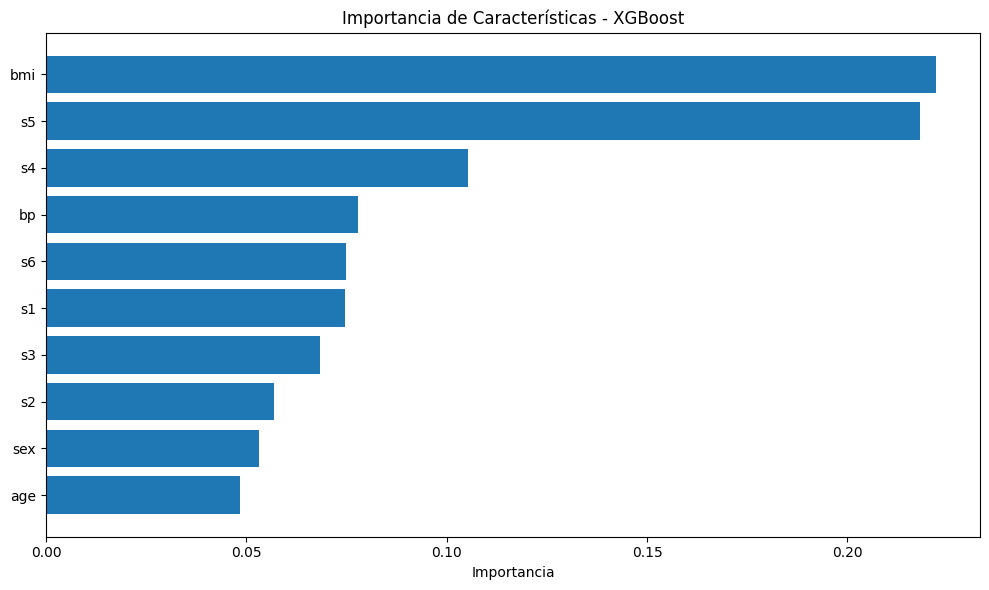

Importancia de características:
age: 0.0485
sex: 0.0533
bmi: 0.2220
bp: 0.0780
s1: 0.0745
s2: 0.0570
s3: 0.0685
s4: 0.1052
s5: 0.2181
s6: 0.0748


In [7]:
# Importancia de características
feature_importance = xgb_diabetes.feature_importances_
feature_names = diabetes.feature_names

# Crear DataFrame para visualización
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importancia')
plt.title('Importancia de Características - XGBoost')
plt.tight_layout()
plt.show()

# Mostrar valores numéricos
print("Importancia de características:")
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance:.4f}")

### 11.6. Monitoreo del Entrenamiento

[0]	validation_0-rmse:73.65748	validation_1-rmse:69.69849
[1]	validation_0-rmse:69.83695	validation_1-rmse:67.15333
[2]	validation_0-rmse:66.46502	validation_1-rmse:65.20655
[3]	validation_0-rmse:63.56706	validation_1-rmse:63.40235
[4]	validation_0-rmse:60.92307	validation_1-rmse:61.65247
[5]	validation_0-rmse:58.39999	validation_1-rmse:59.93197
[6]	validation_0-rmse:56.14495	validation_1-rmse:59.28900
[7]	validation_0-rmse:54.22743	validation_1-rmse:58.49113
[8]	validation_0-rmse:52.45922	validation_1-rmse:58.07841
[9]	validation_0-rmse:50.97950	validation_1-rmse:57.60707
[10]	validation_0-rmse:49.51288	validation_1-rmse:56.78632
[11]	validation_0-rmse:48.09356	validation_1-rmse:56.21761
[12]	validation_0-rmse:46.89518	validation_1-rmse:55.80755
[13]	validation_0-rmse:45.88566	validation_1-rmse:55.64392
[14]	validation_0-rmse:44.89277	validation_1-rmse:55.33524
[15]	validation_0-rmse:44.04149	validation_1-rmse:55.16696
[16]	validation_0-rmse:43.04902	validation_1-rmse:55.10443
[17]	va

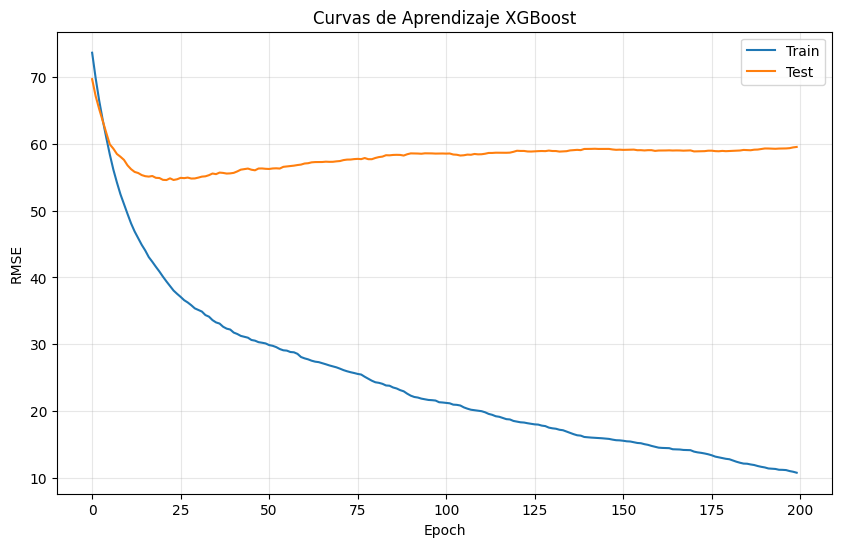

Número total de estimadores configurados: 200
Número de estimadores efectivamente entrenados: 200
Iteración con menor RMSE de validación: 21
Mejor RMSE en entrenamiento: 10.7577
Mejor RMSE en validación: 54.5899
Diferencia Train-Val RMSE (overfitting gap): 48.7896
Mejora promedio en las últimas iteraciones: -0.025546
⚠️ El modelo parece haber convergido (poca mejora reciente)


In [19]:
# Entrenamiento con monitoreo usando XGBRegressor
eval_set = [(X_train, y_train), (X_test, y_test)]

xgb_monitored = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    eval_metric='rmse',  # Métrica se define en el constructor
    random_state=42
)

# Entrenamiento con evaluación en cada iteración
xgb_monitored.fit(
    X_train, y_train,
    eval_set=eval_set,
    #early_stopping_rounds=10,
    verbose=True  # Cambiar a True para ver el progreso
)

# Obtener resultados de evaluación
results = xgb_monitored.evals_result()

# Visualizar curvas de aprendizaje
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
ax.set_ylabel('RMSE')
ax.set_xlabel('Epoch')
ax.set_title('Curvas de Aprendizaje XGBoost')
plt.grid(True, alpha=0.3)
plt.show()

# Mostrar estadísticas del entrenamiento
print(f"Número total de estimadores configurados: {xgb_monitored.n_estimators}")
print(f"Número de estimadores efectivamente entrenados: {len(results['validation_0']['rmse'])}")

# Obtener la mejor iteración si se usó early stopping
if hasattr(xgb_monitored, 'best_iteration'):
    print(f"Mejor iteración (early stopping): {xgb_monitored.best_iteration}")
else:
    # Encontrar la iteración con menor RMSE en validación manualmente
    best_iteration = np.argmin(results['validation_1']['rmse'])
    print(f"Iteración con menor RMSE de validación: {best_iteration}")

print(f"Mejor RMSE en entrenamiento: {min(results['validation_0']['rmse']):.4f}")
print(f"Mejor RMSE en validación: {min(results['validation_1']['rmse']):.4f}")

# Mostrar diferencia entre entrenamiento y validación (indicador de overfitting)
final_train_rmse = results['validation_0']['rmse'][-1]
final_val_rmse = results['validation_1']['rmse'][-1]
overfitting_gap = final_val_rmse - final_train_rmse
print(f"Diferencia Train-Val RMSE (overfitting gap): {overfitting_gap:.4f}")

# Análisis de convergencia
if len(results['validation_1']['rmse']) > 10:
    # Calcular la mejora promedio en las últimas 10 iteraciones
    last_10_improvements = []
    val_rmse = results['validation_1']['rmse']
    for i in range(-10, -1):
        if i + 1 < len(val_rmse):
            improvement = val_rmse[i] - val_rmse[i+1]
            last_10_improvements.append(improvement)
    
    avg_improvement = np.mean(last_10_improvements)
    print(f"Mejora promedio en las últimas iteraciones: {avg_improvement:.6f}")
    
    if avg_improvement < 0.001:
        print("⚠️ El modelo parece haber convergido (poca mejora reciente)")
    else:
        print("✅ El modelo aún estaba mejorando")

[0]	validation_0-rmse:73.62366	validation_1-rmse:70.34851
[10]	validation_0-rmse:50.07161	validation_1-rmse:56.34730


[20]	validation_0-rmse:41.44209	validation_1-rmse:54.10724
[30]	validation_0-rmse:36.56267	validation_1-rmse:54.35112
[40]	validation_0-rmse:32.82187	validation_1-rmse:54.59292
[50]	validation_0-rmse:30.09922	validation_1-rmse:55.50762
[60]	validation_0-rmse:27.62151	validation_1-rmse:55.43989
[70]	validation_0-rmse:25.35246	validation_1-rmse:55.63206
[80]	validation_0-rmse:23.34228	validation_1-rmse:56.13263
[90]	validation_0-rmse:21.46092	validation_1-rmse:56.50299
[100]	validation_0-rmse:19.85350	validation_1-rmse:56.76793
[110]	validation_0-rmse:18.16475	validation_1-rmse:57.22519
[120]	validation_0-rmse:17.09223	validation_1-rmse:57.41007
[130]	validation_0-rmse:15.84598	validation_1-rmse:57.57654
[140]	validation_0-rmse:14.78333	validation_1-rmse:57.77411
[150]	validation_0-rmse:13.74394	validation_1-rmse:57.92691
[160]	validation_0-rmse:12.57749	validation_1-rmse:58.19051
[170]	validation_0-rmse:11.58547	validation_1-rmse:58.57037
[180]	validation_0-rmse:10.63807	validation_1-rm

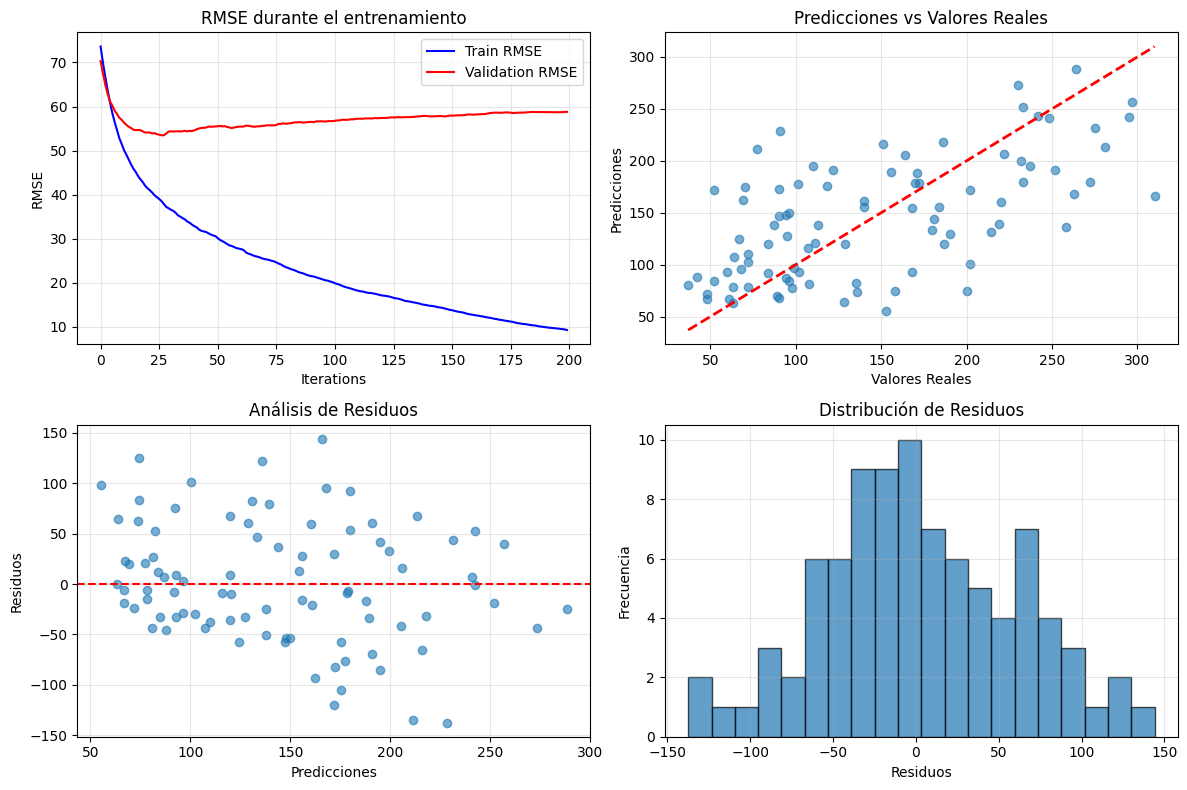

RMSE Final: 58.7891
R² Score: 0.3477
Número total de estimadores: 200


In [30]:
# SOLUCIÓN 2: Usar el wrapper de scikit-learn que sí tiene eval_log
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Usando XGBRegressor en lugar de la API nativa
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    #eval_metric='rmse',
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_estimators=200
)

# Entrenamiento con evaluación
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    #eval_metric='rmse',
    #early_stopping_rounds=10,
    verbose=10
)

# Ahora SÍ podemos acceder al historial de evaluación
eval_results = model.evals_result()

# Convertir a DataFrame
eval_df = pd.DataFrame({
    'train-rmse': eval_results['validation_0']['rmse'],
    'eval-rmse': eval_results['validation_1']['rmse']
})

# Visualizar curvas de aprendizaje
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(eval_df['train-rmse'], label='Train RMSE', color='blue')
plt.plot(eval_df['eval-rmse'], label='Validation RMSE', color='red')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('RMSE durante el entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)

# Predicciones
y_pred_sklearn = model.predict(X_test)

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_sklearn, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.grid(True, alpha=0.3)

# Residuos
residuals = y_test - y_pred_sklearn

plt.subplot(2, 2, 3)
plt.scatter(y_pred_sklearn, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)

# Histograma de residuos
plt.subplot(2, 2, 4)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Métricas finales
print(f"RMSE Final: {np.sqrt(mean_squared_error(y_test, y_pred_sklearn)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred_sklearn):.4f}")
#print(f"Mejor iteración: {model.best_iteration}")
print(f"Número total de estimadores: {model.n_estimators}")

### 11.7. Comparación con Otros Algoritmos

Comparación de Modelos:
                         MSE      R²
Linear Regression  2900.1936  0.4526
Decision Tree      4976.7978  0.0607
Random Forest      2952.0106  0.4428
XGBoost            3351.0016  0.3675


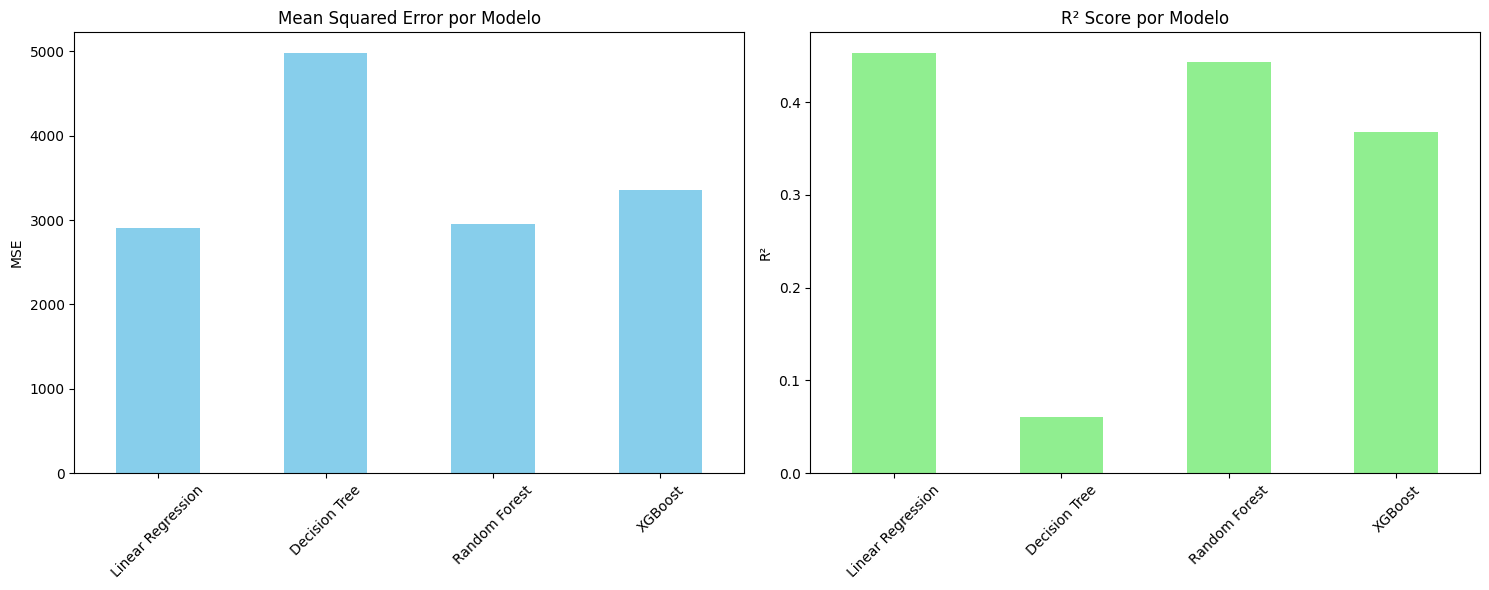

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Modelos para comparar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Entrenamiento y evaluación
results_comparison = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results_comparison[name] = {'MSE': mse, 'R²': r2}

# Mostrar resultados
comparison_df = pd.DataFrame(results_comparison).T
print("Comparación de Modelos:")
print(comparison_df.round(4))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MSE
comparison_df['MSE'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Mean Squared Error por Modelo')
ax1.set_ylabel('MSE')
ax1.tick_params(axis='x', rotation=45)

# R²
comparison_df['R²'].plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('R² Score por Modelo')
ax2.set_ylabel('R²')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 11.8. Técnicas Avanzadas
#### Cross-Validation con XGBoost

In [10]:
# Validación cruzada específica de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Parámetros del modelo
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Cross-validation
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    stratified=False,
    shuffle=True,
    seed=42,
    early_stopping_rounds=10,
    verbose_eval=False
)

print(f"Mejor RMSE CV: {cv_results['test-rmse-mean'].min():.4f}")
print(f"Número óptimo de estimadores: {cv_results['test-rmse-mean'].idxmin() + 1}")


Mejor RMSE CV: 60.0627
Número óptimo de estimadores: 21


#### Interpretabilidad con SHAP

You should consider upgrading via the 'C:\Users\asus  vivobook\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


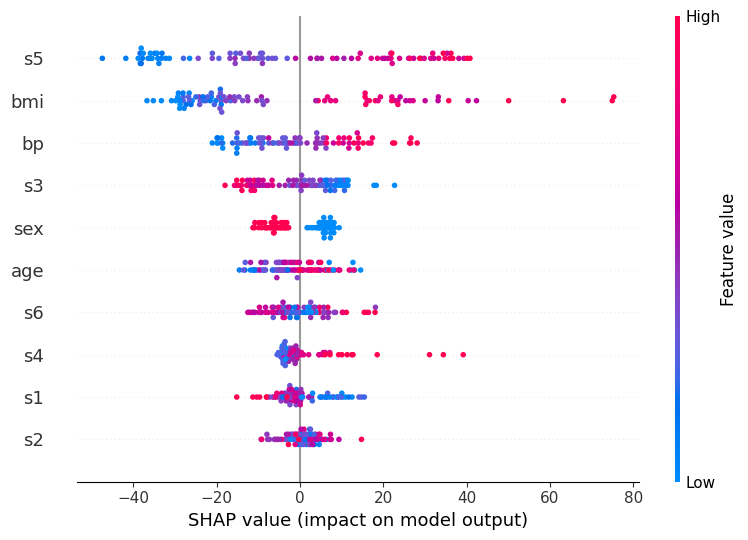

In [11]:
# Instalación de SHAP (si es necesario)
!pip install shap

import shap

# Crear explainer SHAP
explainer = shap.TreeExplainer(xgb_diabetes)
shap_values = explainer.shap_values(X_test[:100])  # Usar subset para velocidad

# Resumen de valores SHAP
shap.summary_plot(shap_values, X_test[:100], feature_names=diabetes.feature_names)

### 11.9. Buenas Prácticas

#### 1. Preprocesamiento de Datos
- XGBoost maneja naturalmente valores faltantes, pero es buena práctica entender su distribución
- La normalización no es estrictamente necesaria pero puede ayudar en la convergencia
- Codificación adecuada de variables categóricas

#### 2. Selección de Hiperparámetros
- Comenzar con valores por defecto y ajustar gradualmente
- `learning_rate` bajo con más `n_estimators` generalmente da mejores resultados
- Usar `early_stopping` para evitar sobreajuste

#### 3. Validación del Modelo
- Siempre usar validación cruzada para evaluar el rendimiento
- Monitorear las curvas de aprendizaje para detectar sobreajuste/subajuste
- Usar múltiples métricas de evaluación

#### 4. Interpretabilidad
- Analizar la importancia de características
- Usar herramientas como SHAP para interpretabilidad local
- Validar que las características importantes tengan sentido del dominio



## Recursos Adicionales

- **Documentación Oficial XGBoost**: https://xgboost.readthedocs.io/
- **XGBoost Paper Original**: Chen & Guestrin (2016)
- **SHAP Documentation**: https://shap.readthedocs.io/
- **Kaggle XGBoost Tutorial**: Múltiples notebooks con casos de uso reales